# ***Computer Vision Assignment-1 Solution***

## ***Basic Level***

##### ***Step-1***

In [2]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd

##### ***Step-2***

In [3]:
# Set device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Define the transformations (Normalization)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize the dataset to range [-1, 1]
])

Using device: cuda


##### ***Step-3***

In [4]:
# Load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Visualize some images (Optional)
dataiter = iter(train_loader)
images, labels = next(dataiter)

##### ***Step-4***

In [5]:
# Define the neural network model
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        # Imput is 28x28 , so 784 input features. Choose 128 and 64 hidden units
        self.fc1 = nn.Linear(28*28, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)   # Second hidden layer
        self.fc3 = nn.Linear(64, 10)     # Output layer for 10 classes

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        # Apply layers + ReLU activations
        x = nn.functional.relu(self.fc1(x)) # First fully connected layer + activation
        x = nn.functional.relu(self.fc2(x))  # Second fully connected layer + activation
        x = self.fc3(x)  # Output layer
        return x

##### ***Step-5***

In [6]:
# Initialize the model, loss function, and optimizer
model = ANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

##### ***Step-6***

In [7]:
# Training the network
num_epochs = 10 # Choose the appropriate number of epochs
ls_losses = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)  # Move images to device
        labels = labels.to(device)  # Move labels to device

        # Forward pass
        outputs = model(images) 
        loss = criterion(outputs, labels)
        ls_losses.append(loss.item())

        # Backward and optimize
        optimizer.zero_grad() # Reset gradients
        loss.backward()  # Compute gradients
        optimizer.step() # Update weights

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [100/938], Loss: 0.2666
Epoch [1/10], Step [200/938], Loss: 0.4011
Epoch [1/10], Step [300/938], Loss: 0.3289
Epoch [1/10], Step [400/938], Loss: 0.4612
Epoch [1/10], Step [500/938], Loss: 0.3579
Epoch [1/10], Step [600/938], Loss: 0.3106
Epoch [1/10], Step [700/938], Loss: 0.3403
Epoch [1/10], Step [800/938], Loss: 0.2688
Epoch [1/10], Step [900/938], Loss: 0.6956
Epoch [2/10], Step [100/938], Loss: 0.2269
Epoch [2/10], Step [200/938], Loss: 0.2972
Epoch [2/10], Step [300/938], Loss: 0.2681
Epoch [2/10], Step [400/938], Loss: 0.0337
Epoch [2/10], Step [500/938], Loss: 0.2882
Epoch [2/10], Step [600/938], Loss: 0.1876
Epoch [2/10], Step [700/938], Loss: 0.1414
Epoch [2/10], Step [800/938], Loss: 0.1935
Epoch [2/10], Step [900/938], Loss: 0.1759
Epoch [3/10], Step [100/938], Loss: 0.2011
Epoch [3/10], Step [200/938], Loss: 0.0777
Epoch [3/10], Step [300/938], Loss: 0.1217
Epoch [3/10], Step [400/938], Loss: 0.0590
Epoch [3/10], Step [500/938], Loss: 0.1368
Epoch [3/10

##### ***Step-7***

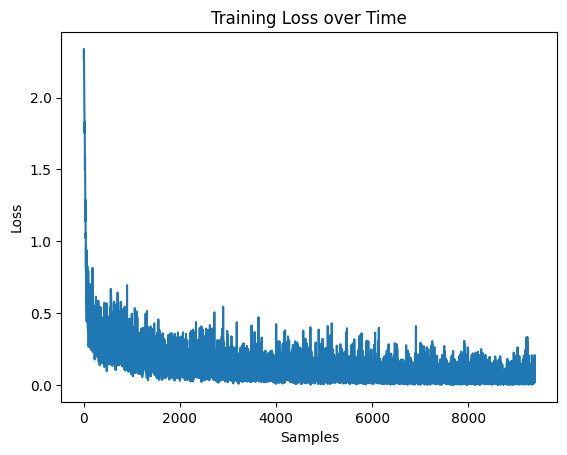

In [8]:
# Plot Losses
x_axis = np.arange(0, len(ls_losses), 1)
plt.plot(x_axis, ls_losses)
plt.xlabel('Samples')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.show()

##### ***Step-8***

In [9]:
# Testing the model
model.eval()  # Set the model to evaluation mode
all_preds = []
all_labels = []
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)  # Move images to device
        labels = labels.to(device)  # Move labels to device

        # Forward pass
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1) # Predicted class

        # Update accuracy counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Append predictions and labels for metrics
        all_preds.extend(predicted.cpu().numpy())  # Append predictions to the list
        all_labels.extend(labels.cpu().numpy())  # Append actual labels to the list

    print(f'Accuracy of the network on the test images: {100 * correct / total}%')

Accuracy of the network on the test images: 97.02%


##### ***Step-9***

Accuracy: 97.02%
Precision: 0.9706
Recall: 0.9702
F1-Score: 0.9702


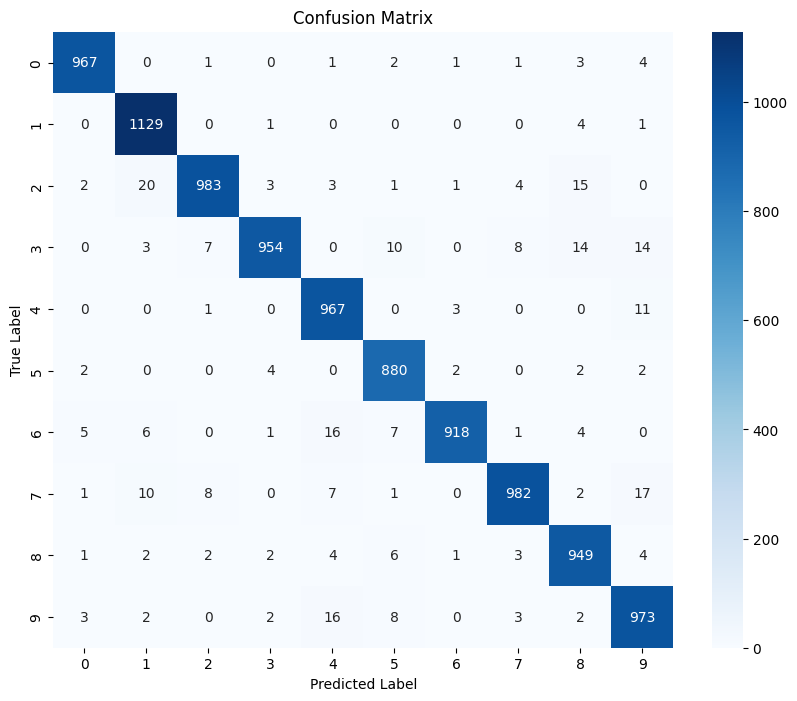

In [10]:
# Convert predictions and labels to numpy arrays for metric calculation
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Confusion matrix calculation
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## ***Advance Level***

##### ***Step-10***

In [11]:
# Define hyperparameters to tune
param_grid = {
    'learning_rate': [0.001, 0.0005],
    'batch_size': [64, 128],
    'num_epochs': [5, 10]
}

best_accuracy = 0
best_params = {}
results = []

# Iterate through hyperparameter combinations
for lr in param_grid['learning_rate']:
    for bs in param_grid['batch_size']:
        for epochs in param_grid['num_epochs']:
            print(f"Training with LR: {lr}, Batch Size: {bs}, Epochs: {epochs}")

            # Re-initialize model, loss, and optimizer
            model = ANN().to(device)
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            # Update DataLoader with new batch size
            train_loader = DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True)
            test_loader = DataLoader(dataset=test_dataset, batch_size=bs, shuffle=False)

            model.train()

            # Training loop (similar to Step 6)
            for epoch in range(epochs):
                for i, (images, labels) in enumerate(train_loader):
                    images = images.to(device).view(-1, 28*28)
                    labels = labels.to(device)

                    outputs = model(images)
                    loss = criterion(outputs, labels)

                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

            # Evaluation loop (similar to Step 8)
            model.eval()
            with torch.no_grad():
                correct = 0
                total = 0
                for images, labels in test_loader:
                    images = images.to(device).view(-1, 28*28)
                    labels = labels.to(device)
                    outputs = model(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

                accuracy = 100 * correct / total
                print(f'Accuracy for LR: {lr}, Batch Size: {bs}, Epochs: {epochs}: {accuracy:.2f}%')

                # Store best parameters
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {'learning_rate': lr, 'batch_size': bs, 'num_epochs': epochs}
                
                results.append({'learning_rate': lr, 'batch_size': bs, 'num_epochs': epochs, 'accuracy': accuracy})

print("\nBest Hyperparameters:")
print(best_params)
print(f"Best Accuracy: {best_accuracy:.2f}%")

Training with LR: 0.001, Batch Size: 64, Epochs: 5
Accuracy for LR: 0.001, Batch Size: 64, Epochs: 5: 96.00%
Training with LR: 0.001, Batch Size: 64, Epochs: 10
Accuracy for LR: 0.001, Batch Size: 64, Epochs: 10: 97.24%
Training with LR: 0.001, Batch Size: 128, Epochs: 5
Accuracy for LR: 0.001, Batch Size: 128, Epochs: 5: 96.33%
Training with LR: 0.001, Batch Size: 128, Epochs: 10
Accuracy for LR: 0.001, Batch Size: 128, Epochs: 10: 96.96%
Training with LR: 0.0005, Batch Size: 64, Epochs: 5
Accuracy for LR: 0.0005, Batch Size: 64, Epochs: 5: 96.68%
Training with LR: 0.0005, Batch Size: 64, Epochs: 10
Accuracy for LR: 0.0005, Batch Size: 64, Epochs: 10: 97.41%
Training with LR: 0.0005, Batch Size: 128, Epochs: 5
Accuracy for LR: 0.0005, Batch Size: 128, Epochs: 5: 95.61%
Training with LR: 0.0005, Batch Size: 128, Epochs: 10
Accuracy for LR: 0.0005, Batch Size: 128, Epochs: 10: 97.13%

Best Hyperparameters:
{'learning_rate': 0.0005, 'batch_size': 64, 'num_epochs': 10}
Best Accuracy: 97.4

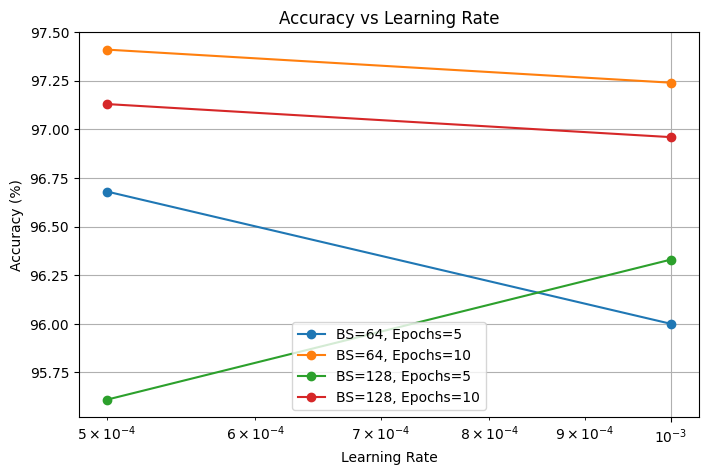

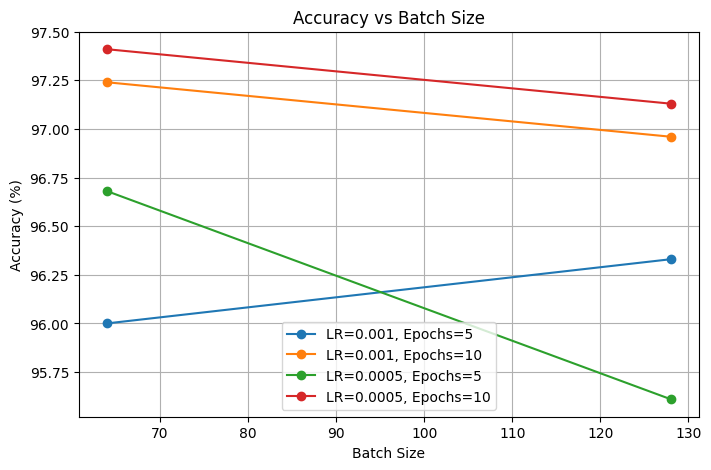

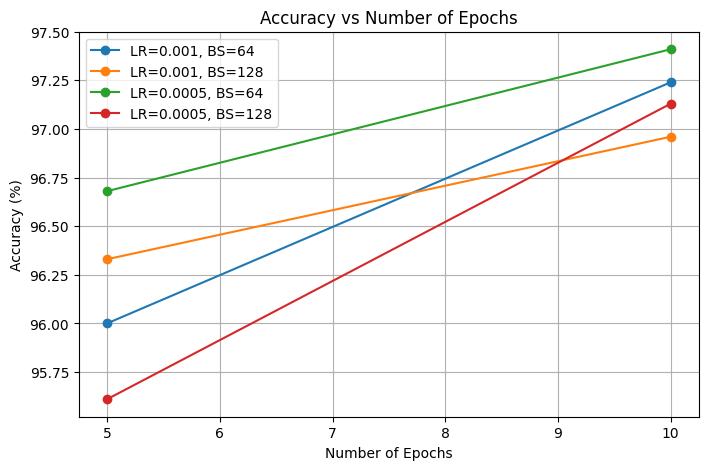

In [12]:
# Convert results to DataFrame
df = pd.DataFrame(results)

# 1.) Accuracy vs Learning Rate
plt.figure(figsize=(8, 5))
for bs in df['batch_size'].unique():
    for epochs in df['num_epochs'].unique():
        subset = df[(df['batch_size'] == bs) & (df['num_epochs'] == epochs)]
        plt.plot(subset['learning_rate'], subset['accuracy'], marker='o', label=f'BS={bs}, Epochs={epochs}')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Learning Rate')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

# 2.) Accuracy vs Batch Size
plt.figure(figsize=(8, 5))
for lr in df['learning_rate'].unique():
    for epochs in df['num_epochs'].unique():
        subset = df[(df['learning_rate'] == lr) & (df['num_epochs'] == epochs)]
        plt.plot(subset['batch_size'], subset['accuracy'], marker='o', label=f'LR={lr}, Epochs={epochs}')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Batch Size')
plt.legend()
plt.grid(True)
plt.show()

# 3.) Accuracy vs Number of Epochs
plt.figure(figsize=(8, 5))
for lr in df['learning_rate'].unique():
    for bs in df['batch_size'].unique():
        subset = df[(df['learning_rate'] == lr) & (df['batch_size'] == bs)]
        plt.plot(subset['num_epochs'], subset['accuracy'], marker='o', label=f'LR={lr}, BS={bs}')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Number of Epochs')
plt.legend()
plt.grid(True)
plt.show()


##### ***Step-11***

In [13]:
# Adding regularization (Dropout) to the ANN model
class ANN_Regularized(nn.Module):
    def __init__(self):
        super(ANN_Regularized, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)  # Dropout with 30% probability
        self.fc2 = nn.Linear(128, 64)  
        self.fc3 = nn.Linear(64, 10)  

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten input image
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Initialize the regularized model
model_regularized = ANN_Regularized().to(device)

# Define loss function and optimizer
criterion_regularized = nn.CrossEntropyLoss()
optimizer_regularized = optim.Adam(model_regularized.parameters(), lr=0.001)

print("Regularized ANN model defined with dropout layers.")

Regularized ANN model defined with dropout layers.
